In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm,gamma,chi2, expon, t

from scipy.special import expit
RANDOM_SEED = 20090425

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/cumulative-area-burnt-by-wildfires-by-week.csv')
for i in range(0,13):
    df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'].fillna(0, inplace=True)
    df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'] = df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'].div(10**6)

print(df.head())


        Entity Code  Week  Y2024_Cumulative_Area_Burnt  \
0  Afghanistan  AFG     1                     0.000391   
1  Afghanistan  AFG     2                     0.000559   
2  Afghanistan  AFG     3                     0.000841   
3  Afghanistan  AFG     4                     0.000841   
4  Afghanistan  AFG     5                     0.000841   

   Y2023_Cumulative_Area_Burnt  Y2022_Cumulative_Area_Burnt  \
0                          0.0                     0.000000   
1                          0.0                     0.000000   
2                          0.0                     0.000000   
3                          0.0                     0.000000   
4                          0.0                     0.000215   

   Y2021_Cumulative_Area_Burnt  Y2020_Cumulative_Area_Burnt  \
0                     0.001246                     0.000000   
1                     0.002680                     0.000963   
2                     0.003539                     0.001181   
3                   

In [3]:
for i in range(1,13):
    df['Y'+str(2024-i)+'_Weekly_Area_Burnt'] = df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'].diff().fillna(df['Y'+str(2024-i)+'_Cumulative_Area_Burnt'])
    
    

In [4]:
total_Cumulative_Area_Burnt=0
total_Weekly_Area_Burnt=0
for i in range(1,13):
    total_Cumulative_Area_Burnt=total_Cumulative_Area_Burnt+df['Y'+str(2024-i)+'_Cumulative_Area_Burnt']
    
for i in range(1,13):
    total_Weekly_Area_Burnt=total_Weekly_Area_Burnt+df['Y'+str(2024-i)+'_Weekly_Area_Burnt']
    
    
df['Total_Cumulative_Area_Burnt']=total_Cumulative_Area_Burnt
df['Avg_Cumulative_Area_Burnt']=df['Total_Cumulative_Area_Burnt']/(12)
df['Total_Weekly_Area_Burnt']=total_Weekly_Area_Burnt
df['Avg_Weekly_Area_Burnt']=df['Total_Weekly_Area_Burnt']/(12)


print(df.head())

        Entity Code  Week  Y2024_Cumulative_Area_Burnt  \
0  Afghanistan  AFG     1                     0.000391   
1  Afghanistan  AFG     2                     0.000559   
2  Afghanistan  AFG     3                     0.000841   
3  Afghanistan  AFG     4                     0.000841   
4  Afghanistan  AFG     5                     0.000841   

   Y2023_Cumulative_Area_Burnt  Y2022_Cumulative_Area_Burnt  \
0                          0.0                     0.000000   
1                          0.0                     0.000000   
2                          0.0                     0.000000   
3                          0.0                     0.000000   
4                          0.0                     0.000215   

   Y2021_Cumulative_Area_Burnt  Y2020_Cumulative_Area_Burnt  \
0                     0.001246                     0.000000   
1                     0.002680                     0.000963   
2                     0.003539                     0.001181   
3                   

In [37]:
code = 'India'  # Replace 'AFG' with the code you want to filter by
filtered_df = df[df['Entity'] == code]
print(filtered_df.head())



     Entity Code  Week  Y2024_Cumulative_Area_Burnt  \
5564  India  IND     1                     0.031859   
5565  India  IND     2                     0.072352   
5566  India  IND     3                     0.095556   
5567  India  IND     4                     0.123409   
5568  India  IND     5                     0.164804   

      Y2023_Cumulative_Area_Burnt  Y2022_Cumulative_Area_Burnt  \
5564                     0.042192                     0.022214   
5565                     0.098799                     0.033561   
5566                     0.134174                     0.051016   
5567                     0.177263                     0.068366   
5568                     0.257538                     0.105660   

      Y2021_Cumulative_Area_Burnt  Y2020_Cumulative_Area_Burnt  \
5564                     0.027710                     0.012033   
5565                     0.058857                     0.053999   
5566                     0.103274                     0.073217   
5567    

In [38]:
filtered_df.Avg_Weekly_Area_Burnt

5564    0.022731
5565    0.031245
5566    0.033736
5567    0.036469
5568    0.056260
5569    0.059633
5570    0.107016
5571    0.190020
5572    0.312355
5573    0.474968
5574    0.623844
5575    0.650055
5576    0.784956
5577    0.501822
5578    0.486996
5579    0.325476
5580    0.313057
5581    0.175875
5582    0.132456
5583    0.108598
5584    0.113262
5585    0.062476
5586    0.040520
5587    0.016544
5588    0.004310
5589    0.003077
5590    0.001487
5591    0.001429
5592    0.000721
5593    0.000912
5594    0.000812
5595    0.000867
5596    0.000923
5597    0.000956
5598    0.001606
5599    0.001012
5600    0.001617
5601    0.002505
5602    0.003611
5603    0.007280
5604    0.017867
5605    0.054491
5606    0.201326
5607    0.419557
5608    0.265654
5609    0.096374
5610    0.044690
5611    0.021529
5612    0.025409
5613    0.030428
5614    0.040240
5615    0.040127
Name: Avg_Weekly_Area_Burnt, dtype: float64

In [39]:
Avg_Weekly_Area_Burnt_mean = filtered_df.Avg_Weekly_Area_Burnt.mean()
Avg_Weekly_Area_Burnt_std = filtered_df.Avg_Weekly_Area_Burnt.std()
Avg_Weekly_Area_Burnt_mean,Avg_Weekly_Area_Burnt_std

(0.13367665224358968, 0.19599083544683424)

In [40]:
Avg_Cumulative_Area_Burnt_mean=filtered_df.Avg_Cumulative_Area_Burnt.mean()
Avg_Cumulative_Area_Burnt_std=filtered_df.Avg_Cumulative_Area_Burnt.std()
Avg_Cumulative_Area_Burnt_mean,Avg_Cumulative_Area_Burnt_std

(4.569093786858974, 2.2775449694153402)

<AxesSubplot:>

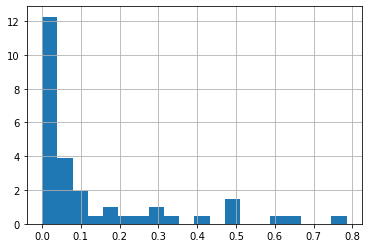

In [41]:
filtered_df.Avg_Weekly_Area_Burnt.hist(density=True, bins=20)

In [42]:
# print(filtered_df.Avg_Weekly_Area_Burnt)

from scipy import stats


params = stats.gamma.fit(filtered_df.Avg_Weekly_Area_Burnt)
norm_dist_fitted = stats.gamma(*params)
D, p = stats.kstest(filtered_df.Avg_Weekly_Area_Burnt, norm_dist_fitted.cdf)

print(f"KS Statistic: {D}, p-value: {p}")
# Gamma: KS Statistic: 0.061551429628492804, p-value: 0.9823432098461718
# norm: KS Statistic: 0.12702982139109276, p-value: 0.3417923770028968


KS Statistic: 0.17742616889627238, p-value: 0.06659973527745933


Justifying that data matches the Gamma distribution involves a combination of statistical tests, visual assessment, and understanding the nature of the data. Here's how you can justify the Gamma distribution as a good fit:

Statistical Tests: Use goodness-of-fit tests like the Kolmogorov-Smirnov test. The p-value obtained from the test is high (0.98234), which indicates that there is no significant evidence to reject the null hypothesis that the data comes from a Gamma distribution. Remember that a high p-value does not confirm the null hypothesis; it simply fails to provide evidence against it.

Quantile-Quantile (Q-Q) Plot: A Q-Q plot can be very useful to see if the data quantiles match up with the quantiles of the Gamma distribution. A straight line in the Q-Q plot indicates that the distributions match well.

Parameter Estimates: Make sure that the parameters of the Gamma distribution (shape 
�
k, scale 
�
θ) make sense in the context of your data. For instance, if your data represents waiting times or the size of insurance claims, a Gamma distribution might be appropriate since it's often used in these contexts.

Theoretical Justification: Understand and explain why the Gamma distribution is appropriate for your data based on the nature of the data. The Gamma distribution is often used to model the time until an event occurs, the size of insurance claims, or any process with a waiting time between Poisson-distributed events.

Comparison with Other Distributions: Compare the Gamma distribution's fit with other candidate distributions. You have already done this with the Normal distribution and found that the Gamma distribution fits better.

By combining these approaches, you can provide a robust justification for using the Gamma distribution to model your data. Always remember that statistical modeling involves assessing the fit from multiple perspectives and often requires subject-matter expertise to determine the most appropriate model for the data.

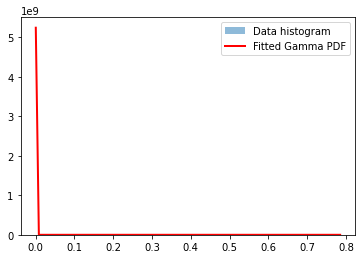

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

# Assume 'data' contains your dataset and 'a', 'loc', 'scale' are the fitted parameters for the Gamma distribution
data = filtered_df.Avg_Weekly_Area_Burnt
a, loc, scale = gamma.fit(data)
x = np.linspace(min(data), max(data), 100)
y = gamma.pdf(x, a, loc, scale)

plt.hist(data, bins=30, density=True, alpha=0.5, label='Data histogram')
plt.plot(x, y, 'r-', lw=2, label='Fitted Gamma PDF')
plt.legend()
plt.show()


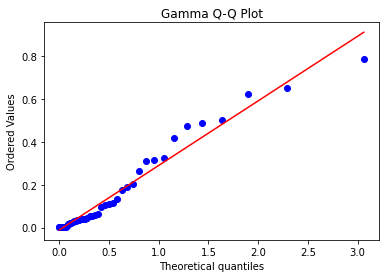

In [44]:
# Quantitile plot
import scipy.stats as stats

stats.probplot(data, dist="gamma", sparams=(a,), plot=plt)
plt.title('Gamma Q-Q Plot')
plt.show()


In [45]:
# filtered_df.Avg_Cumulative_Area_Burnt.hist(density=True,bins=20)

In [46]:
#per year  the prob of avg area burning btw (200-250) hectre is <0.002, (80,120)>0.004
# means that in 'y' year in 'x' week prob of avg area burning btw (200-250) is <0.002, (80,120)>0.004

In [47]:
Avg_Weekly_Area_Burnt_alpha_mom = Avg_Weekly_Area_Burnt_mean ** 2 / Avg_Weekly_Area_Burnt_std
Avg_Weekly_Area_Burnt_beta_mom = Avg_Weekly_Area_Burnt_std / Avg_Weekly_Area_Burnt_mean
Avg_Weekly_Area_Burnt_alpha_mom, Avg_Weekly_Area_Burnt_beta_mom

(0.09117491292035945, 1.4661560725630214)

In [48]:
# Avg_Cumulative_Area_Burnt_alpha_mom = Avg_Cumulative_Area_Burnt_mean ** 2 / Avg_Cumulative_Area_Burnt_std
# Avg_Cumulative_Area_Burnt_beta_mom = Avg_Cumulative_Area_Burnt_std / Avg_Cumulative_Area_Burnt_mean
# Avg_Cumulative_Area_Burnt_alpha_mom, Avg_Cumulative_Area_Burnt_beta_mom

0.19409715977673453


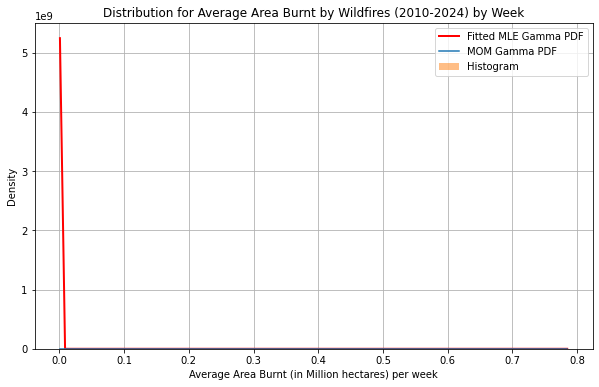

In [49]:
# Historical values
historical_values = filtered_df.Avg_Weekly_Area_Burnt

# Calculate mean and standard deviation
mean = np.mean(historical_values)
std_dev = np.std(historical_values)
print(std_dev)
# Generate data for the normal distribution curve
x = np.linspace(min(historical_values), max(historical_values), 100)
y1=gamma.pdf(x, a=Avg_Weekly_Area_Burnt_alpha_mom, scale=Avg_Weekly_Area_Burnt_beta_mom)
a, loc, scale = gamma.fit(historical_values)
y = gamma.pdf(x, a, loc, scale)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', lw=2, label='Fitted MLE Gamma PDF')
plt.plot(x, y1, label='MOM Gamma PDF')
plt.hist(historical_values, bins=30, density=True, alpha=0.5, label='Histogram')
plt.title('Distribution for Average Area Burnt by Wildfires (2010-2024) by Week')
plt.xlabel('Average Area Burnt (in Million hectares) per week')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
RANDOM_SEED = 20090425
from pymc3 import Model, Exponential, Gamma

with Model() as wildfire_avg_area_burnt_gamma_model:
    ealpha = Exponential('ealpha', 1/9.)
    ebeta = Exponential('ebeta', 1/9.)
    wildfire_avg_area_burnt_like = Gamma('wildfire_avg_area_burnt_like', alpha=ealpha, beta=ebeta, observed=historical_values)

Finished [100%]: Average Loss = -55.142
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Anurag\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


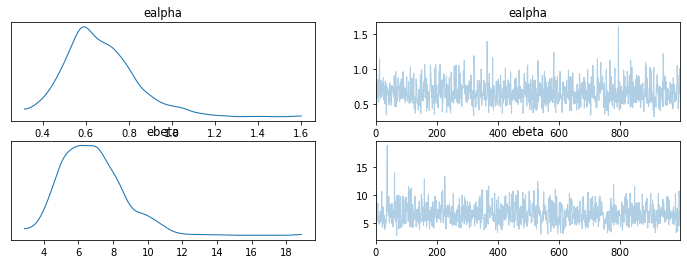

In [51]:
from pymc3 import fit
import arviz as az

with wildfire_avg_area_burnt_gamma_model: 
    wildfire_avg_area_burnt_trace_gamma = fit(random_seed=RANDOM_SEED).sample(1000)
    
az.plot_trace(wildfire_avg_area_burnt_trace_gamma)
plt.show()    

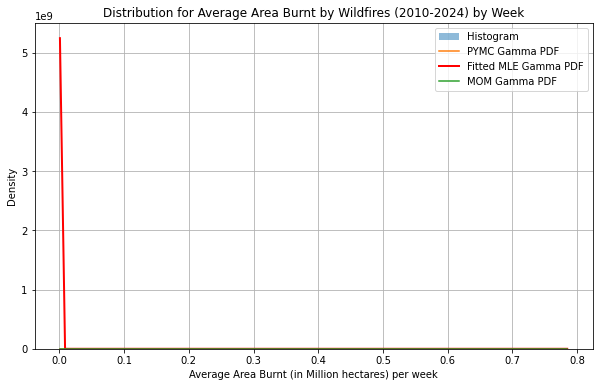

In [52]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = wildfire_avg_area_burnt_trace_gamma['ealpha'].mean()
ebeta_posterior_mean = wildfire_avg_area_burnt_trace_gamma['ebeta'].mean()

x=np.linspace(min(historical_values), max(historical_values), 100)
mom_gamma_y=gamma.pdf(x, a=Avg_Weekly_Area_Burnt_alpha_mom, scale=Avg_Weekly_Area_Burnt_beta_mom)
a, loc, scale = gamma.fit(historical_values)
mle_gamma_y = gamma.pdf(x, a, loc, scale)
pymc_gamma_y =gamma.pdf(x, ealpha_posterior_mean, scale=1/ebeta_posterior_mean)
# plt.hist(Avg_Wildfire_Area_Burnt_Per_Year_Values, bins=10,edgecolor='black', density=True, alpha=0.5, label='Histogram')
plt.figure(figsize=(10, 6))

plt.hist(historical_values, bins=30, density=True, alpha=0.5, label='Histogram')
plt.plot(x,pymc_gamma_y , label='PYMC Gamma PDF')
plt.plot(x, mle_gamma_y, 'r-', lw=2, label='Fitted MLE Gamma PDF')
plt.plot(x, mom_gamma_y, label='MOM Gamma PDF')
plt.title('Distribution for Average Area Burnt by Wildfires (2010-2024) by Week')
plt.xlabel('Average Area Burnt (in Million hectares) per week')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from scipy.stats import kstest

# Empirical data CDF vs. Theoretical CDF from fitted parameters
ks_statistic_mom, p_value_mom = kstest(historical_values, 'gamma', args=(Avg_Weekly_Area_Burnt_alpha_mom, 0, Avg_Weekly_Area_Burnt_beta_mom))
ks_statistic_mle, p_value_mle = kstest(historical_values, 'gamma', args=(a, loc, scale))
ks_statistic_pymc, p_value_pymc = kstest(historical_values, 'gamma', args=(ealpha_posterior_mean, 0, 1/ebeta_posterior_mean))

print(f"MOM: KS statistic = {ks_statistic_mom}, p-value = {p_value_mom}")
print(f"MLE: KS statistic = {ks_statistic_mle}, p-value = {p_value_mle}")
print(f"PyMC: KS statistic = {ks_statistic_pymc}, p-value = {p_value_pymc}")


MOM: KS statistic = 0.5228453306180343, p-value = 9.24545220176154e-14
MLE: KS statistic = 0.17742616889627238, p-value = 0.06659973527745933
PyMC: KS statistic = 0.18425768458575228, p-value = 0.051129679955395635


In [54]:

# # Historical values
# historical_values = filtered_df.Avg_Cumulative_Area_Burnt

# # Calculate mean and standard deviation
# mean = np.mean(historical_values)
# std_dev = np.std(historical_values)
# print(std_dev)
# # Generate data for the normal distribution curve
# x = np.linspace(min(historical_values), max(historical_values), 100)
# y = norm.pdf(x, mean, std_dev)
# y1=gamma.pdf(x, a=Avg_Cumulative_Area_Burnt_alpha_mom, scale=Avg_Cumulative_Area_Burnt_beta_mom)
# y2 = uniform.pdf(x,loc=min(historical_values), scale=max(historical_values)-min(historical_values))
# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(x, y, label='Normal Distribution')
# # plt.plot(x, y1, label='Gamma Distribution')
# plt.plot(x, y2, label='Uniform Distribution')
# plt.hist(historical_values, bins=20, density=True, alpha=0.5, label='Histogram')
# plt.title('Distribution for Average Cummulative Area Burnt by Wildfires (2010-2024) by Week')
# plt.xlabel('Average Cummulative Area Burnt (in Million hectares) per week')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.show()


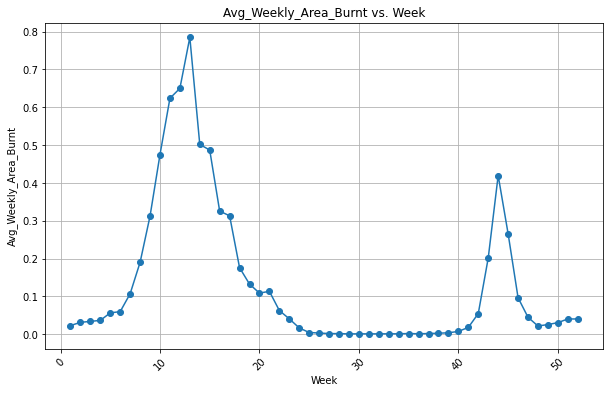

In [55]:

# Assuming 'Week' and 'Total' are columns in your DataFrame, and it is named 'df'
# You may need to adjust column names accordingly
# Also assuming df is sorted by week

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Week'], filtered_df['Avg_Weekly_Area_Burnt'], marker='o', linestyle='-')
plt.title('Avg_Weekly_Area_Burnt vs. Week')
plt.xlabel('Week')
plt.ylabel('Avg_Weekly_Area_Burnt')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


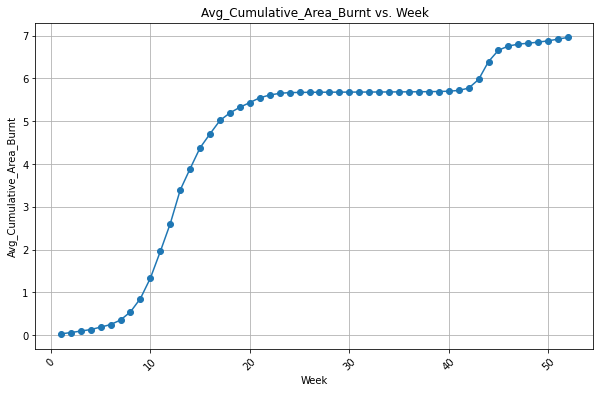

In [56]:
import matplotlib.pyplot as plt

# Assuming 'Week' and 'Total' are columns in your DataFrame, and it is named 'df'
# You may need to adjust column names accordingly
# Also assuming df is sorted by week

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Week'], filtered_df['Avg_Cumulative_Area_Burnt'], marker='o', linestyle='-')
plt.title('Avg_Cumulative_Area_Burnt vs. Week')
plt.xlabel('Week')
plt.ylabel('Avg_Cumulative_Area_Burnt')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


In [57]:
# 
var_value = '_Weekly_Area_Burnt'
# var_value = '_Cumulative_Area_Burnt'

In [58]:
Wildfire_Cumulative_Area_Burnt_Per_Week_Dict = {}
count = 0
for index, row in filtered_df.iterrows():
    l = []
    for column_name in filtered_df.columns:
        if column_name.endswith(var_value):
            l.append(row[column_name])
    l = l[:-2]
    Wildfire_Cumulative_Area_Burnt_Per_Week_Dict['Week'+str(count+1)+var_value+'_Values'] = l
    count = count +1

In [59]:
# import matplotlib.pyplot as plt
# import numpy as np
# # Provided data
# # data = [7706102, 7273826, 6823054, 6243280, 8420206, 9185009, 8567571, 9048469, 9403529, 11393788, 9838285, 9556322, 867121]

# data = Wildfire_Cumulative_Area_Burnt_Per_Week_Dict.get('Week1'+var_value+'_Values')
# # Plotting the histogram
# plt.figure(figsize=(10, 6))

# plt.hist(data, bins=5,edgecolor='black', density=True, alpha=0.5, label='Histogram')

# plt.title('Histogram of World Data')
# plt.xlabel('Values')
# plt.ylabel('Density')
# plt.grid(True)
# plt.show()





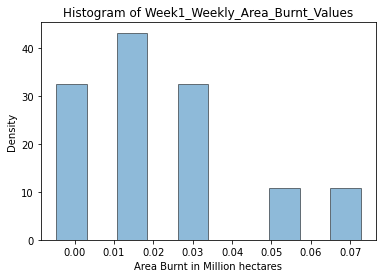

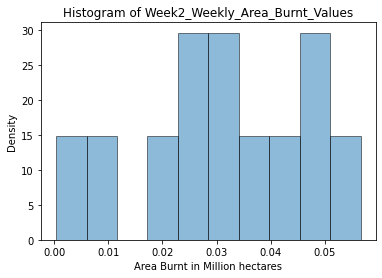

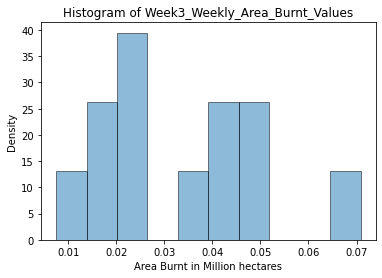

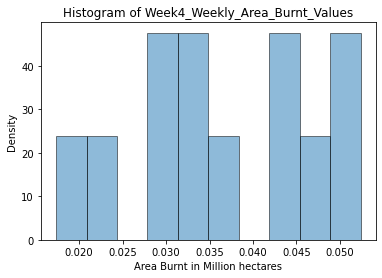

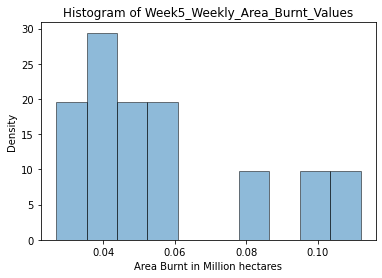

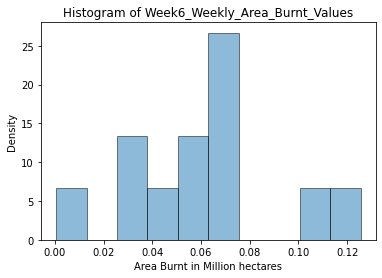

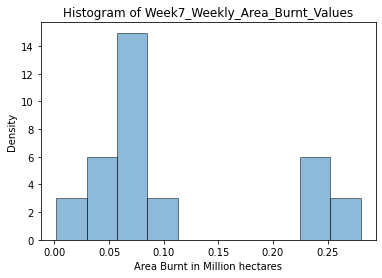

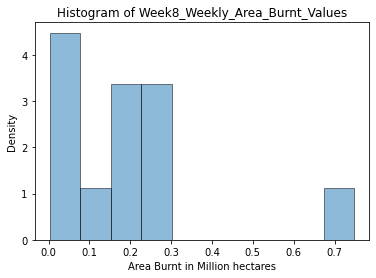

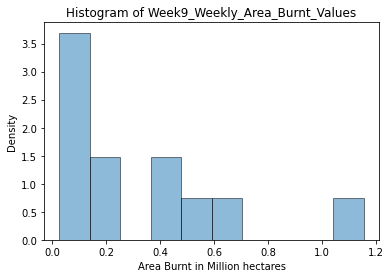

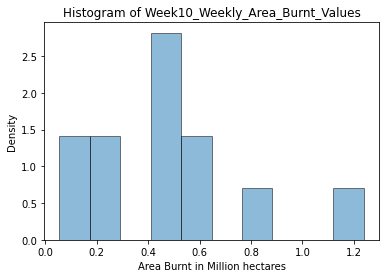

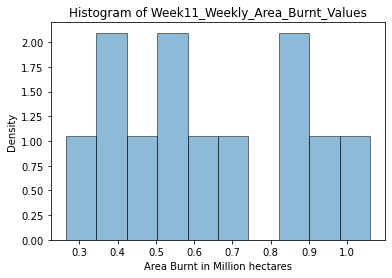

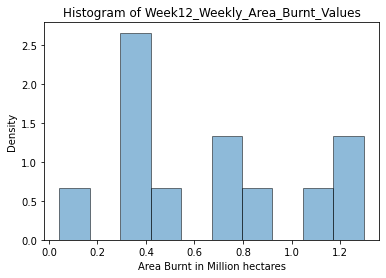

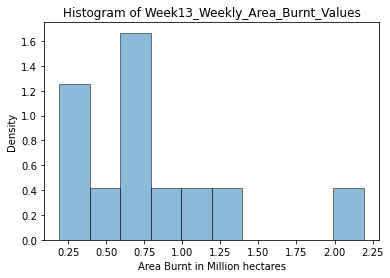

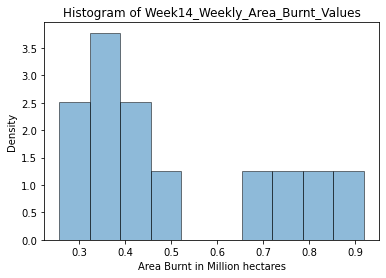

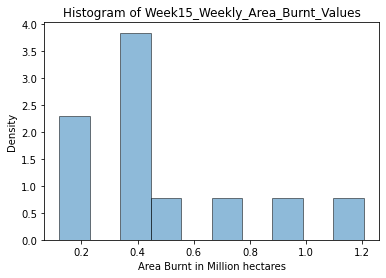

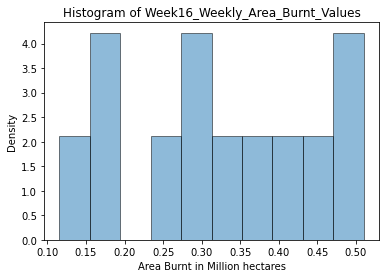

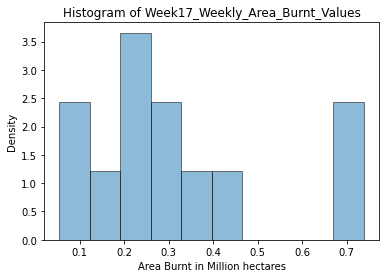

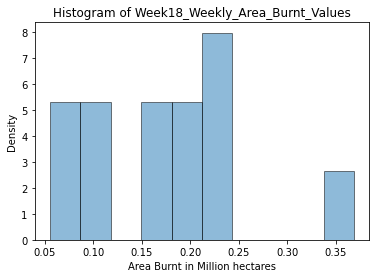

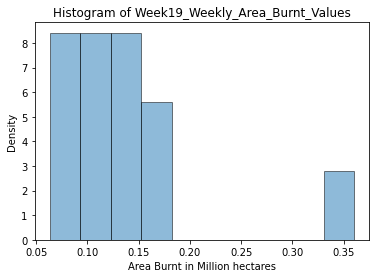

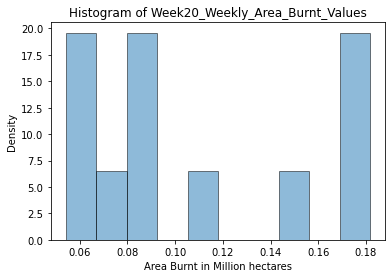

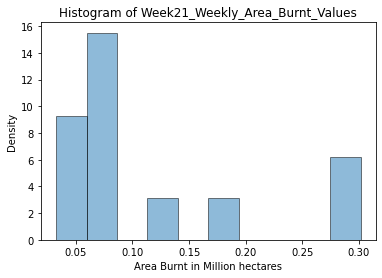

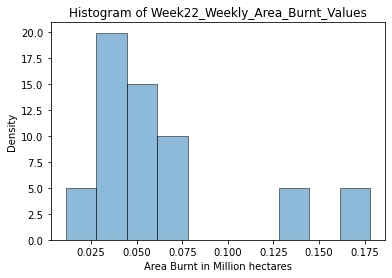

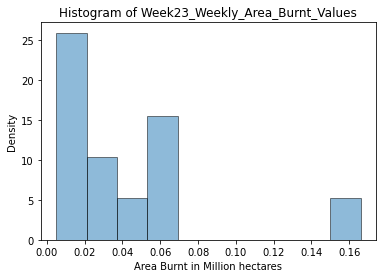

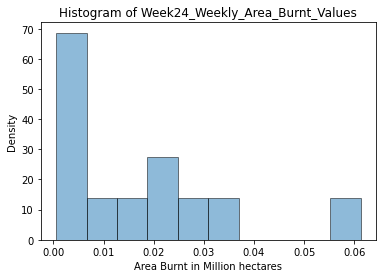

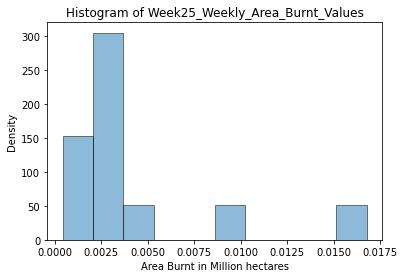

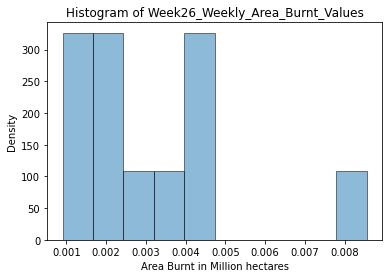

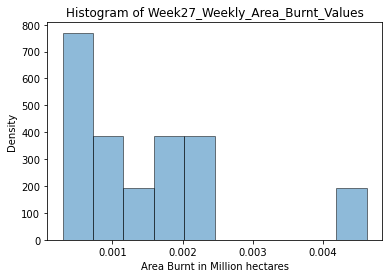

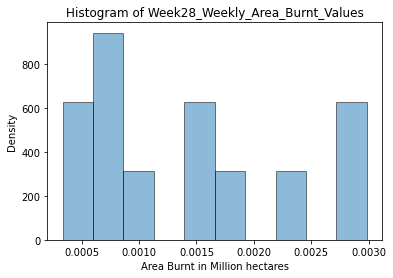

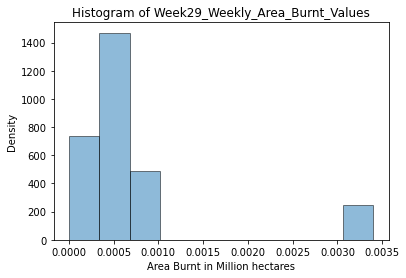

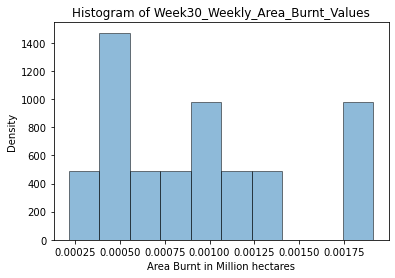

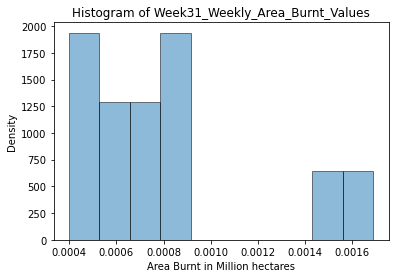

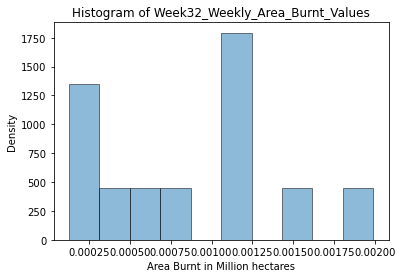

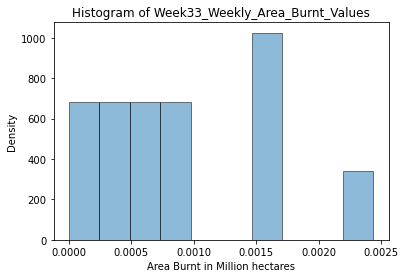

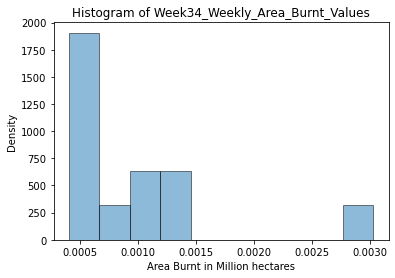

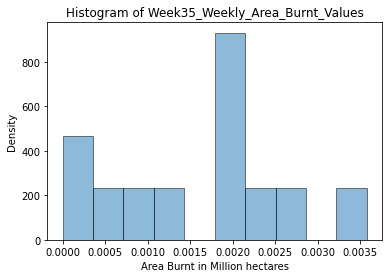

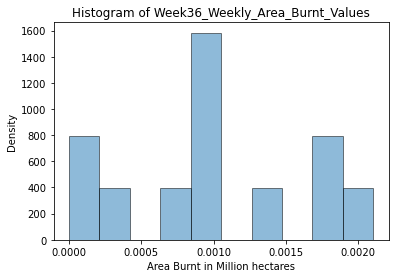

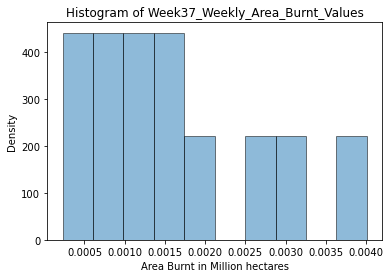

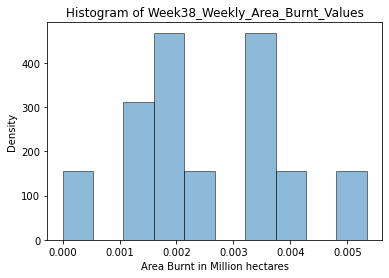

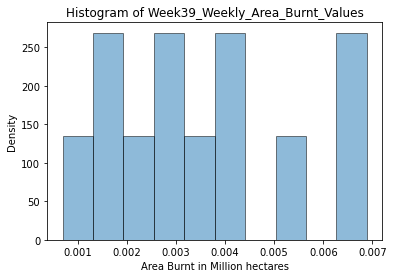

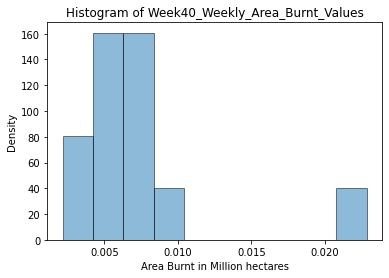

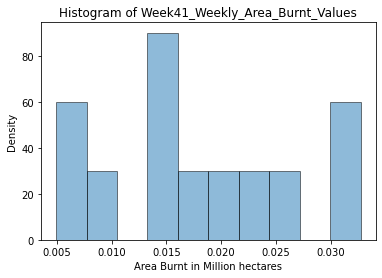

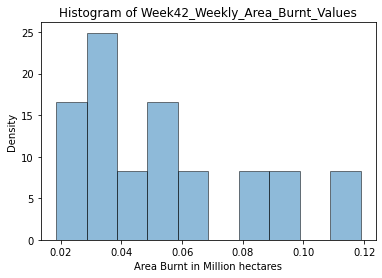

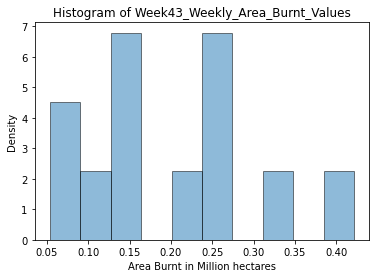

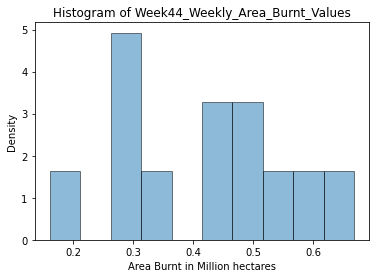

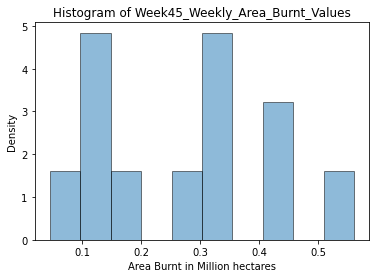

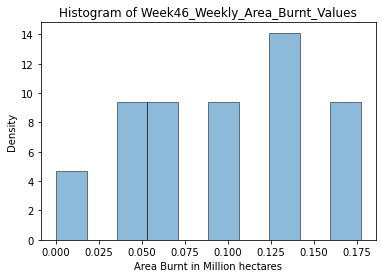

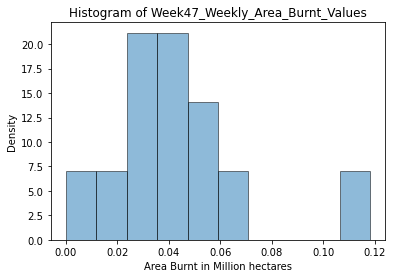

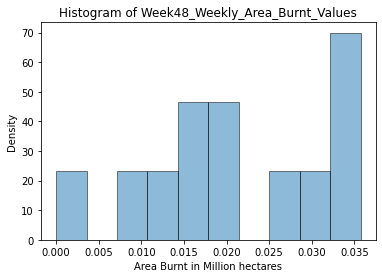

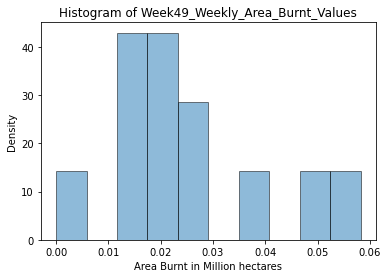

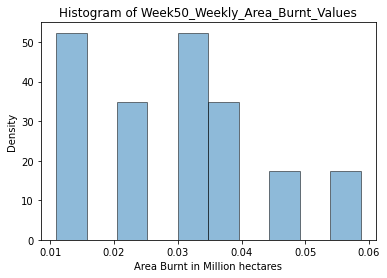

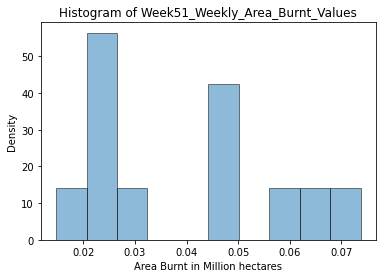

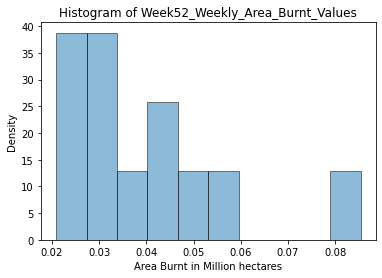

<Figure size 432x288 with 0 Axes>

In [60]:
for key, values in Wildfire_Cumulative_Area_Burnt_Per_Week_Dict.items():
    plt.hist(values, bins=10,edgecolor='black', density=True, alpha=0.5, label='Histogram')
    plt.title('Histogram of ' + key)
    plt.xlabel('Area Burnt in Million hectares')
    plt.ylabel('Density')
    plt.grid(False)
    plt.show()

plt.tight_layout()

In [61]:
# The graph indicates that the probability of the area burned being between 0.9 and 1.2 in the 22nd week is 0.25
# week 1 lo 0.6 hecre land burn aye prob 0.75



In [62]:
Avg_Wildfire_Area_Burnt_Per_Year_Values=[]
for i in range(1,13):
    Avg_Wildfire_Area_Burnt_Per_Year_Values.append(filtered_df['Y'+str(2024-i)+var_value].sum()/12)

In [63]:
Avg_Wildfire_Area_Burnt_Per_Year_Values

[0.43949275000000004,
 0.6339609999999999,
 0.9562758333333333,
 0.4456539166666667,
 0.5136295833333333,
 0.5401201666666666,
 0.5887770833333333,
 0.7185144166666667,
 0.44111225,
 0.5369061666666667,
 0.4684001666666667,
 0.6683425833333333]

In [64]:
Avg_Wildfire_Area_Burnt_Per_Year_Values_mean = np.mean(Avg_Wildfire_Area_Burnt_Per_Year_Values)
Avg_Wildfire_Area_Burnt_Per_Year_Values_std = np.std(Avg_Wildfire_Area_Burnt_Per_Year_Values)
Per_year_Avg_Weekly_Area_Burnt_alpha_mom = Avg_Wildfire_Area_Burnt_Per_Year_Values_mean ** 2 / Avg_Wildfire_Area_Burnt_Per_Year_Values_std
Per_year_Avg_Weekly_Area_Burnt_beta_mom = Avg_Wildfire_Area_Burnt_Per_Year_Values_std / Avg_Wildfire_Area_Burnt_Per_Year_Values_mean
Per_year_Avg_Weekly_Area_Burnt_alpha_mom, Per_year_Avg_Weekly_Area_Burnt_beta_mom

(2.329671371373035, 0.2486468693282498)

0.5792654930555555 0.1440325513581489


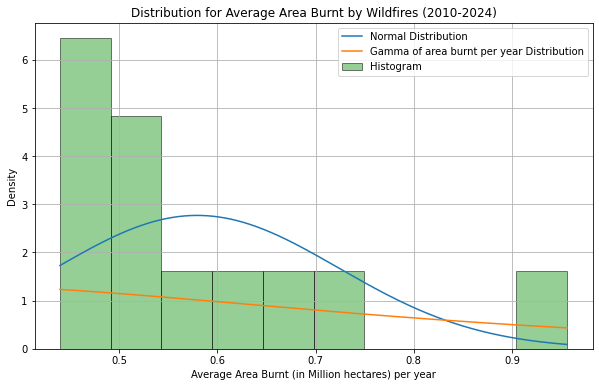

In [65]:
data = Avg_Wildfire_Area_Burnt_Per_Year_Values

l_mean = Avg_Wildfire_Area_Burnt_Per_Year_Values_mean
l_std = Avg_Wildfire_Area_Burnt_Per_Year_Values_std
print(l_mean,l_std)
# Plotting the histogram

x = np.linspace(min(data), max(data), 1000)

y = norm.pdf(x, l_mean, l_std)
y1=gamma.pdf(x, a=Per_year_Avg_Weekly_Area_Burnt_alpha_mom, scale=Per_year_Avg_Weekly_Area_Burnt_beta_mom)
y2 = expon.pdf(x, scale=l_mean)
# student_t_pdf = t.pdf(x, 3)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
plt.plot(x, y1, label='Gamma of area burnt per year Distribution')
# plt.plot(x, y2, label='Exponential Distribution')
# plt.plot(x, student_t_pdf, label='Student T Distribution')
plt.hist(data, bins=10,edgecolor='black', density=True, alpha=0.5, label='Histogram')
plt.title('Distribution for Average Area Burnt by Wildfires (2010-2024)')
plt.xlabel('Average Area Burnt (in Million hectares) per year')
plt.ylabel('Density')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
